# Table of contents

1. [Error correcting codes](#error)  
    1.1 [Figure](#plotchannel)  
    1.2 [Repetition codes](#repetition)  
    1.3 [Hamming (4,7) code](#hamming)  
    1.4 [Decoding the Hamming code](#dechamming)  
2. [Channel capacity](#capacity) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<a id="error"> </a>
# Error correcting codes

<a id="plotchannel"> </a>
## Figure

![](Channel.png)


<a id="repetition"> </a>
## Repetition codes

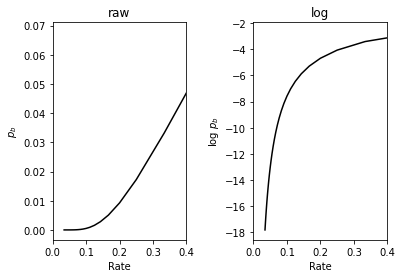

Error probability of R3 0.033167438349248214


0.5310044064107187

In [66]:
N = np.arange(2,30) # the number of repetitions
K = (N+1)/2
f = 0.1

# Binary entropy function
def H2(x):
    H2= x*np.log2(1/x) + (1-x)*np.log2(1/(1-x))
    return H2

# # The less precise Sterling approximation
#N_chose_K = 2**(N*H2(K/N))

# The more precise Sterling approximation
N_chose_K = 2**(N)*(1/np.sqrt((2*np.pi*N)/4)) 

# Calculate the probability of an error
pb = N_chose_K * f**((N+1)/2) * (1-f)**((N-1)/2)

# Plot
plt.subplot(121)
plt.plot(1/N,pb, color='black')
plt.title("raw")
plt.ylabel('$p_b$')
plt.xlabel('Rate')
plt.xlim(0,0.4,0.1)

plt.subplot(122)
plt.plot(1/N,np.log(pb), color='black')
plt.title("log")
plt.ylabel('log $p_b$')
plt.xlabel('Rate')
plt.xlim(0,0.4,0.1)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()

print('Error probability of R3', pb[1])

<a id="hamming"> </a>
## Hamming (7,4) code

Create the generative matrix, the signal, and the transmitted signal

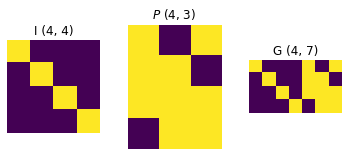

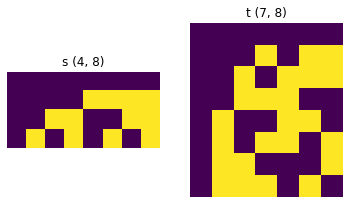

Transmitted messages (each in one row):
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0. 1. 0.]]


In [49]:
# Create the generator matrix
I = np.array(np.identity(4))
P = np.array([[1, 0, 1], 
              [1, 1, 0], 
              [1, 1, 1],
              [0, 1, 1]])
G=np.concatenate((I,P),axis=1)

# Signal
s = np.array([[0, 0, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 1, 0],
              [0, 0, 1, 1],
              
              [0, 1, 0, 0],
              [0, 1, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 1, 1]])

s = s.T

# Calculate the transmitted signal
t = G.T@s %2 # modulo 2 matrix multiplication

#print(G.T.shape)

#Plot the main matrices
plt.subplot(131)
plt.imshow(I), plt.axis('off')
plt.title('I '+str(I.shape))

plt.subplot(132)
plt.imshow(P), plt.axis('off')
plt.title('$P$ ' + str(P.shape))

plt.subplot(133)
plt.imshow(G), plt.axis('off')
plt.title('G ' + str(G.shape))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.show()

# Plot the signal and the transmitted signal
plt.subplot(121)
plt.imshow(s), plt.axis('off')
plt.title('s ' + str(s.shape))

plt.subplot(122)
plt.imshow(t.T), plt.axis('off')
plt.title('t ' + str(t.shape))

plt.show()

print('Transmitted messages (each in one row):')
print(t.T)

<a id="dechamming"> </a>
## Decoding the (7,4) Hamming code

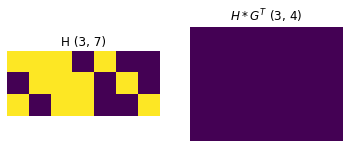

In [53]:
# Take the syndrome
z = t[:,4:7]

# Parity check matrix H
H=np.concatenate((P.T,np.array(np.identity(3))),axis=1)

#Plot the H matrix and solve Excercise 1.4
plt.subplot(121)
plt.imshow(H), plt.axis('off')
plt.title('H ' + str(H.shape))

plt.subplot(122)
plt.imshow(H@G.T %2), plt.axis('off')
plt.title('$H * G^T$ ' + str((H@G.T %2).shape))

plt.show()
# Show s and t
# print('s vector (signal) = ',s)
# print('')
# print('t vector (transmitted) = ',t.T)
# print('')
# print('z vector (syndrome) = ',z)

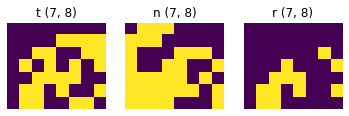

In [33]:
# Noise matrix
n = np.random.randint(2, size=t.shape)

# Received signal matrix
r = np.multiply(n,t) 

#Plot 
plt.subplot(131)
plt.imshow(t), plt.axis('off')
plt.title('t ' + str(t.shape))

plt.subplot(132)
plt.imshow(n), plt.axis('off')
plt.title('n ' + str(n.shape))

plt.subplot(133)
plt.imshow(r), plt.axis('off')
plt.title('r ' + str(r.shape))

plt.show()


<a id="capacity"> </a>
# Channel capacity

$C(f) = 1-H_2$

In [57]:
f = 0.1

# Binary entropy function
def H2(x):
    H2= x*np.log2(1/x) + (1-x)*np.log2(1/(1-x))
    return H2

#Channel capacity
C = 1-H2(f)

print('Capacity of a channel with f=0.1 is:', C)




Capacity of a channel with f=0.1 is: 0.5310044064107187


# RIP code
